# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
cities

['puerto ayora',
 'tura',
 'east london',
 'bethel',
 'midvagur',
 'tash-kumyr',
 'albany',
 'waitangi',
 'klaksvik',
 'yuzhno-kurilsk',
 'khandyga',
 'blackmans bay',
 'brisas de zicatela',
 'hailar',
 'anadyr',
 'iskateley',
 'adamstown',
 'iqaluit',
 'stanley',
 'elmendorf air force base',
 'villa gesell',
 'nantucket',
 'grytviken',
 'edinburgh of the seven seas',
 'taiohae',
 'puerto natales',
 'dudinka',
 'mouy',
 'isafjordur',
 'mananara',
 'ahau',
 'saudarkrokur',
 'greymouth',
 'papatowai',
 'akjoujt',
 'sumbawa besar',
 'gisborne',
 'port-aux-francais',
 'devinuwara',
 'tralee',
 'tazacorte',
 'aasiaat',
 'margaret river',
 'puerto leguizamo',
 'yellowknife',
 'hasaki',
 'pandan',
 'bilibino',
 'juan de acosta',
 'thinadhoo',
 'honefoss',
 'kingston',
 'thompson',
 'west island',
 'constantia',
 'enewetak',
 'malabar',
 'gadzhiyevo',
 'tolanaro',
 'port mathurin',
 'lamu',
 "namp'o",
 'codrington',
 'santa elena de uairen',
 'kone',
 'porto novo',
 'maintirano',
 'alcantara',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | midvagur
Processing Record 6 of Set 1 | tash-kumyr
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | yuzhno-kurilsk
Processing Record 11 of Set 1 | khandyga
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | brisas de zicatela
Processing Record 14 of Set 1 | hailar
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 21 of Set 1 | villa gesell
Processing Record 22 o

In [10]:
city_data

[{'City': 'puerto ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 293.46,
  'Humidity': 92,
  'Cloudiness': 49,
  'Wind Speed': 2.24,
  'Country': 'EC',
  'Date': 1722818411},
 {'City': 'tura',
  'Lat': 25.5198,
  'Lng': 90.2201,
  'Max Temp': 298.65,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 1.46,
  'Country': 'IN',
  'Date': 1722818412},
 {'City': 'east london',
  'Lat': -33.0153,
  'Lng': 27.9116,
  'Max Temp': 287.1,
  'Humidity': 51,
  'Cloudiness': 7,
  'Wind Speed': 9.44,
  'Country': 'ZA',
  'Date': 1722818414},
 {'City': 'bethel',
  'Lat': 41.3712,
  'Lng': -73.414,
  'Max Temp': 296.81,
  'Humidity': 88,
  'Cloudiness': 100,
  'Wind Speed': 0.45,
  'Country': 'US',
  'Date': 1722818415},
 {'City': 'midvagur',
  'Lat': 62.0511,
  'Lng': -7.1939,
  'Max Temp': 285.61,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 10.8,
  'Country': 'FO',
  'Date': 1722818416},
 {'City': 'tash-kumyr',
  'Lat': 41.3461,
  'Lng': 72.2171,
  'Max Temp': 297.64,
  'H

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,293.46,92,49,2.24,EC,1722818411
1,tura,25.5198,90.2201,298.65,94,100,1.46,IN,1722818412
2,east london,-33.0153,27.9116,287.10,51,7,9.44,ZA,1722818414
3,bethel,41.3712,-73.4140,296.81,88,100,0.45,US,1722818415
4,midvagur,62.0511,-7.1939,285.61,94,100,10.80,FO,1722818416


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,293.46,92,49,2.24,EC,1722818411
1,tura,25.5198,90.2201,298.65,94,100,1.46,IN,1722818412
2,east london,-33.0153,27.9116,287.10,51,7,9.44,ZA,1722818414
3,bethel,41.3712,-73.4140,296.81,88,100,0.45,US,1722818415
4,midvagur,62.0511,-7.1939,285.61,94,100,10.80,FO,1722818416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

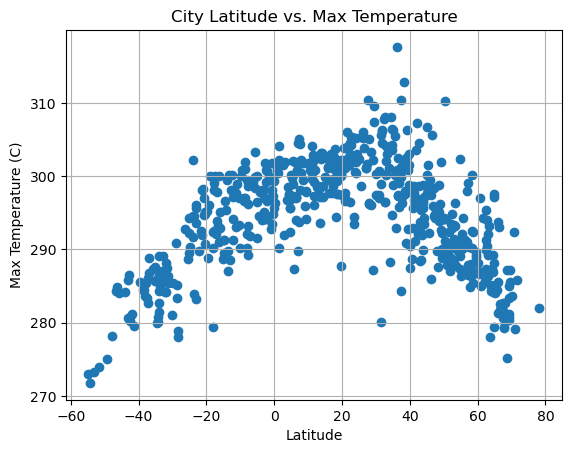

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

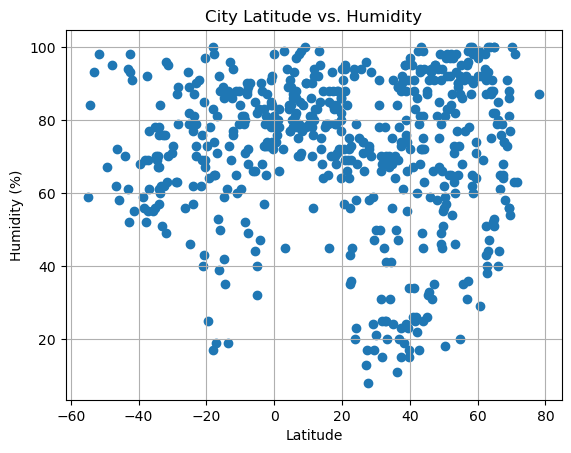

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

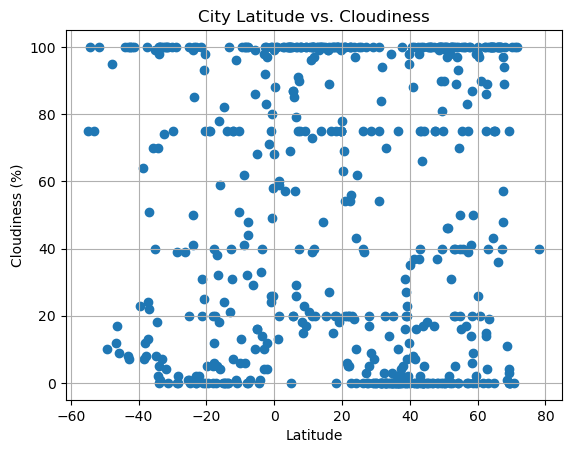

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

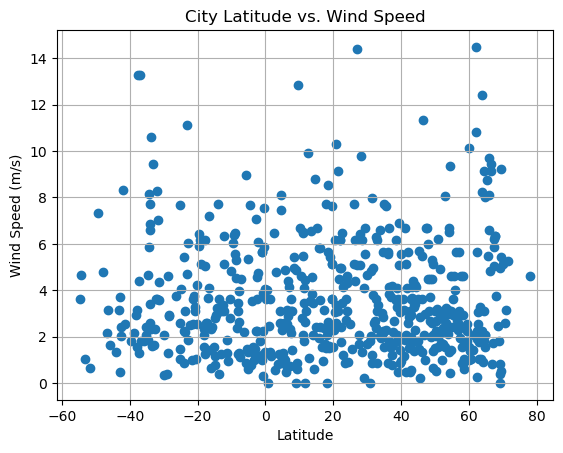

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

In [32]:
city_data_df.head(3)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,293.46,92,49,2.24,EC,1722818411
1,tura,25.5198,90.2201,298.65,94,100,1.46,IN,1722818412
2,east london,-33.0153,27.9116,287.10,51,7,9.44,ZA,1722818414


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [60]:
# Define a function to create Linear Regression plots
def lin_regress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    return ({"slope": slope,
             "intercept": intercept, 
             "rvalue": rvalue, 
             "pvalue": pvalue, 
             "stderr": stderr
             })


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tura,25.5198,90.2201,298.65,94,100,1.46,IN,1722818412
3,bethel,41.3712,-73.4140,296.81,88,100,0.45,US,1722818415
4,midvagur,62.0511,-7.1939,285.61,94,100,10.80,FO,1722818416
5,tash-kumyr,41.3461,72.2171,297.64,34,37,1.86,KG,1722818417
6,albany,42.6001,-73.9662,298.65,79,37,0.45,US,1722817757


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,293.46,92,49,2.24,EC,1722818411
2,east london,-33.0153,27.9116,287.10,51,7,9.44,ZA,1722818414
7,waitangi,-43.9535,-176.5597,284.16,70,100,1.34,NZ,1722818420
11,blackmans bay,-43.0167,147.3167,285.78,61,8,0.45,AU,1722818425
16,adamstown,-25.0660,-130.1015,294.30,79,100,7.69,PN,1722818431


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.40920631810958097


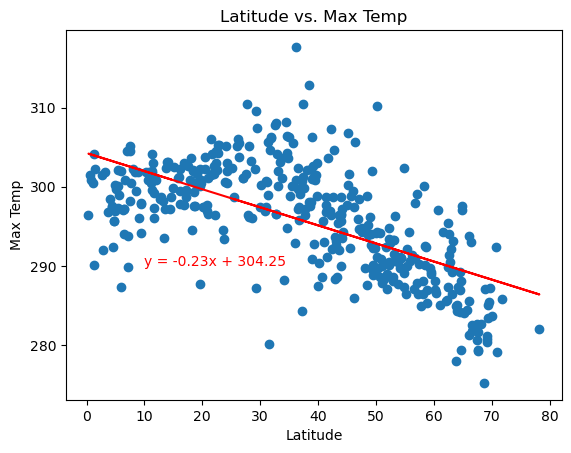

In [73]:
# Linear regression on Northern Hemisphere
regress_north = lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
regress_north_values = northern_hemi_df["Lat"] * regress_north["slope"] + regress_north["intercept"]

# Calculating the correlation coefficient
print (f'The r^2 value is: {regress_north["rvalue"]**2}')

# Equation of the line
north_line_eq = "y = " + str(round(regress_north["slope"],2)) + "x + " + str(round(regress_north["intercept"],2))

# Plotting the graph
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"],regress_north_values,"r-")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.text(10,290, north_line_eq, c='r')

# Show plot
plt.show()

The r^2-value is: 0.6720220238897325


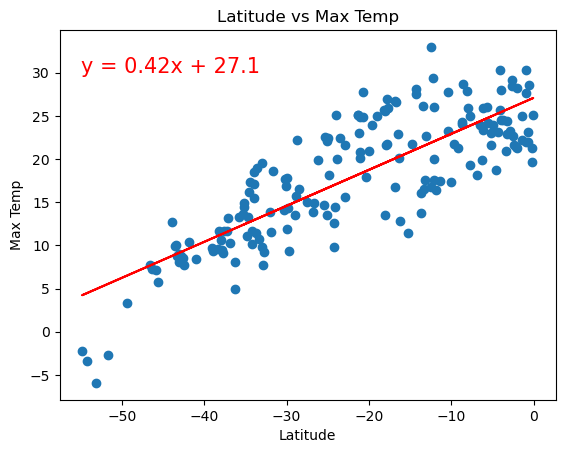

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


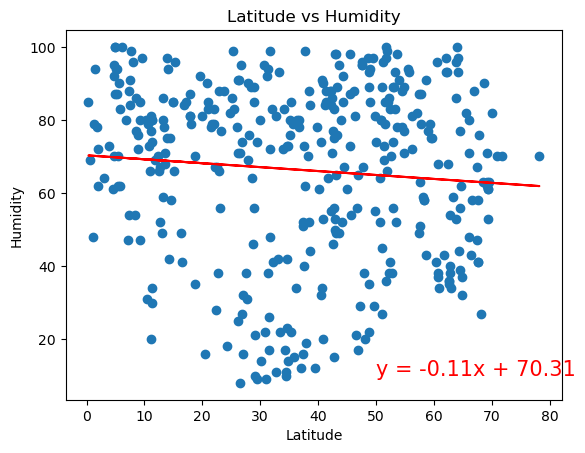

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


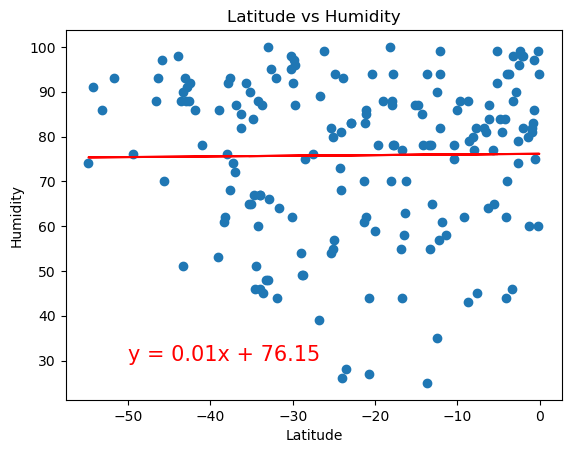

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


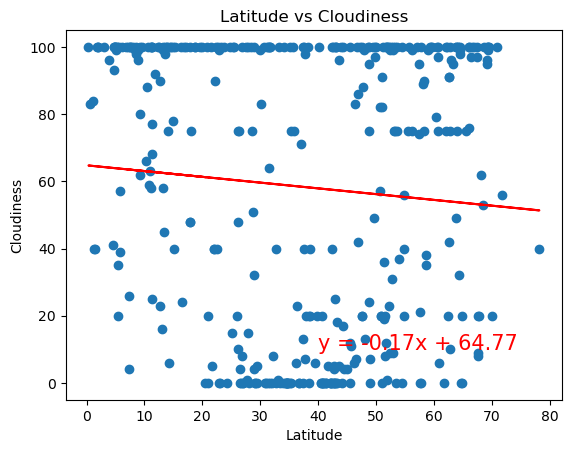

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


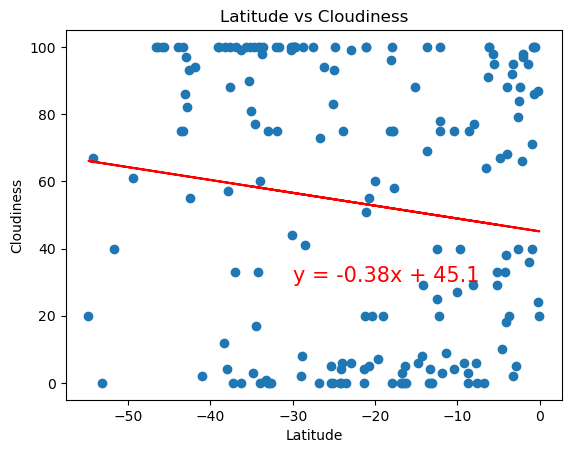

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


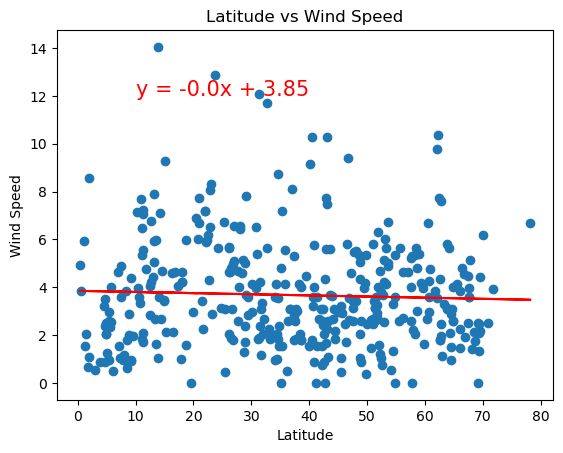

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


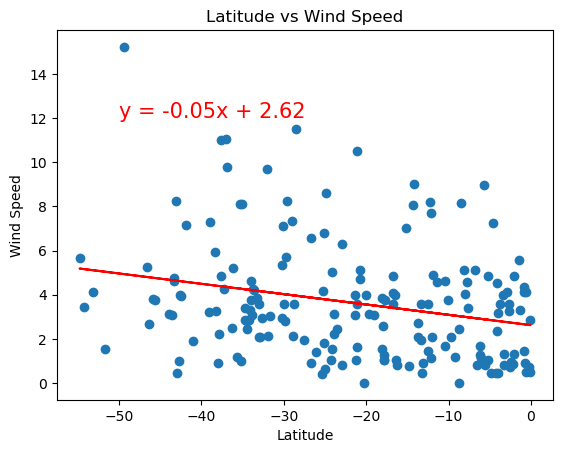

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE